# 1. Data Audit and Cleaning

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading and Reading Dataset
data = pd.read_csv("Electric Vehicle Sales.csv")

In [3]:
data.head()

,Year,Month_Name,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014,jan,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0
1,2014,jan,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0
2,2014,jan,Andhra Pradesh,AMBULANCE,Others,Others,0
3,2014,jan,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0
4,2014,jan,Andhra Pradesh,BUS,Bus,Bus,0


In [4]:
# Total Rows and Columns
data.shape

(96845, 7)

In [5]:
# Basic information
basic_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               96845 non-null  int64 
 1   Month_Name         96845 non-null  object
 2   State              96845 non-null  object
 3   Vehicle_Class      96845 non-null  object
 4   Vehicle_Category   96845 non-null  object
 5   Vehicle_Type       96845 non-null  object
 6   EV_Sales_Quantity  96845 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 5.2+ MB


In [6]:
# Basic Statistics
data["EV_Sales_Quantity"].describe()

count    96845.000000
mean        37.108896
std        431.566675
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20584.000000
Name: EV_Sales_Quantity, dtype: float64

In [7]:
# Checking for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows : {duplicates}")

Number of duplicate rows : 0


In [8]:
# Checking for missing values
missing_values = data.isnull().sum()
print(missing_values)

Year                 0
Month_Name           0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64


In [9]:
# Converting Year column to int datatype
data["Year"] = data["Year"].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               96845 non-null  int64 
 1   Month_Name         96845 non-null  object
 2   State              96845 non-null  object
 3   Vehicle_Class      96845 non-null  object
 4   Vehicle_Category   96845 non-null  object
 5   Vehicle_Type       96845 non-null  object
 6   EV_Sales_Quantity  96845 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 5.2+ MB


In [10]:
# Total number of unique values in each column
data.nunique()

Year                   11
Month_Name             12
State                  34
Vehicle_Class          73
Vehicle_Category        5
Vehicle_Type           12
EV_Sales_Quantity    1447
dtype: int64

In [11]:
# Show unique values in each column
unique_values = {col: data[col].unique() for col in data.columns}
unique_values

{'Year': array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]),
 'Month_Name': array(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
        'oct', 'nov', 'dec'], dtype=object),
 'State': array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
        'Andaman & Nicobar Island', 'Bihar', 'Chhattisgarh', 'Chandigarh',
        'DNH and DD', 'Delhi', 'Goa', 'Gujarat', 'Himachal Pradesh',
        'Haryana', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
        'Maharashtra', 'Meghalaya', 'Madhya Pradesh', 'Mizoram',
        'Nagaland', 'Odisha', 'Punjab', 'Puducherry', 'Rajasthan',
        'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttarakhand', 'Uttar Pradesh',
        'West Bengal', 'Jammu and Kashmir', 'Manipur'], dtype=object),
 'Vehicle_Class': array(['ADAPTED VEHICLE', 'AGRICULTURAL TRACTOR', 'AMBULANCE',
        'ARTICULATED VEHICLE', 'BUS', 'CASH VAN', 'CRANE MOUNTED VEHICLE',
        'EDUCATIONAL INSTITUTION BUS', 'EXCAVATOR (COMMERCIAL)',
        'FORK

### Observations 
- There are total 96845 rows and 8 columns.
- The stats show that the mean sales quantity is around 37 units and the standard deviation(spread of data) is 431.6 which is way bigger than the mean and it shows that the data is very spread out and positively skewed(lots of 0's and very few large numbers).
- The 25th percentile, median(50%) and 75th percentile are all 0 which shows that atleast 75% of the rows have 0 sales.
- Also the max value is 20584 vs the mean is 37 shows that those high values are clear outliers.
- onverted the Year column from float to int to represent it as a integer.
- Since the dataset was found to be free of missing values and duplicate entries, data cleaning was not necessary at this stage.


# 2. Exploratory Data Analysis(EDA)

In [12]:
# importing essential libraries for EDA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Univariate Analysis

In [13]:
# Total EV sales Year wise
data.groupby("Year")["EV_Sales_Quantity"].sum()

Year
2014       2392
2015       7805
2016      49855
2017      87420
2018     130254
2019     166819
2020     124684
2021     331498
2022    1024723
2023    1525179
2024     143182
Name: EV_Sales_Quantity, dtype: int64

### 1. Boxplot Distribution

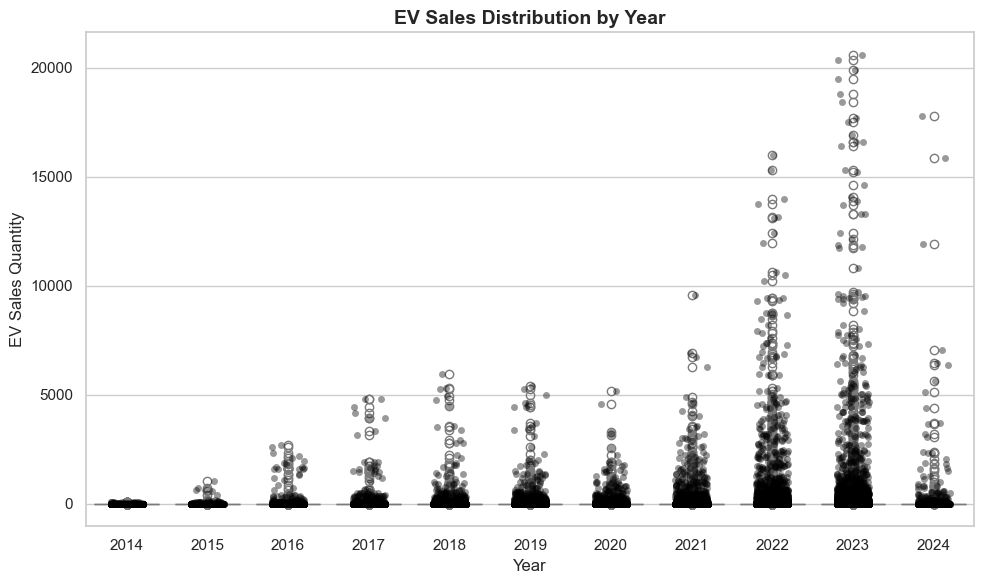

In [14]:
# Create a boxplot for year wise sales quantity

sns.set(style = "whitegrid", palette = "pastel")

plt.figure(figsize=(10, 6))
sns.boxplot(x = "Year", y = "EV_Sales_Quantity", data = data, showfliers = True)

# Add swarmplot to show all points 
sns.stripplot(x = "Year", y = "EV_Sales_Quantity", data = data, color = "black", alpha = 0.4, jitter = 0.2)

plt.title("EV Sales Distribution by Year", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("EV Sales Quantity", fontsize=12)

plt.tight_layout()
plt.show()


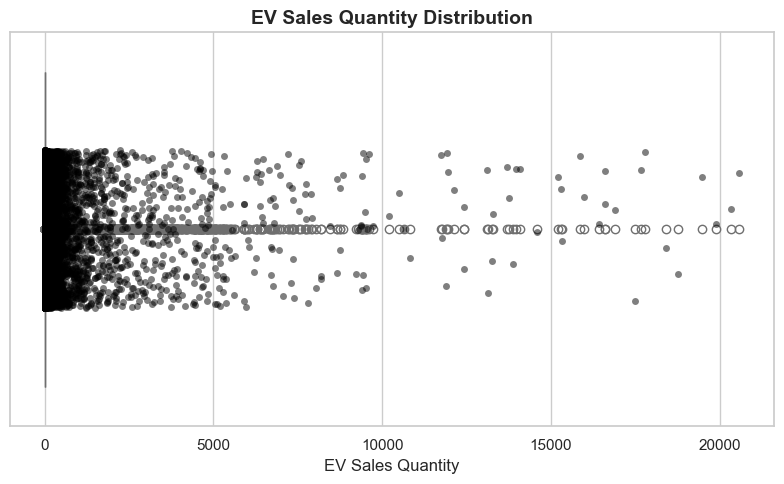

In [15]:
# Create a boxplot for EV_Sales_Quantity

sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(8, 5))
sns.boxplot(x="EV_Sales_Quantity", data=data, color="skyblue", showfliers=True)

# Add individual data points 
sns.stripplot(x="EV_Sales_Quantity", data=data, color="black", alpha=0.5, jitter=0.2)

plt.title("EV Sales Quantity Distribution", fontsize = 14, fontweight = 'bold')
plt.xlabel("EV Sales Quantity", fontsize = 12)
plt.tight_layout()
plt.show()


### Observations
- The boxplot of EV sales by year shows that early years (2014–2016) had almost negligible sales, with most records showing zero. From 2021 onward, median and average sales rise sharply, and extreme high-value points represent valid bulk sales events, indicating rapid adoption of EVs in recent years.
- Although boxplots reveal extreme outliers in EV sales (20,584 units), these values align with the sharp growth trend observed from 2021 onwards. Therefore, these outliers reflect genuine business scenarios and not data errors.

### 2. Bar plots for frequency distribution

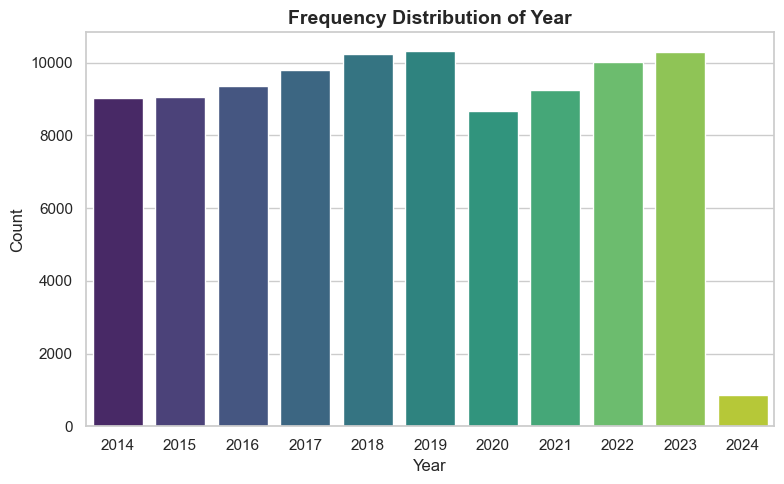

In [16]:
year_count = data['Year'].value_counts().reset_index()
year_count.columns = ['Year', 'Count']

sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(8, 5))
sns.barplot(x="Year", y="Count", data=year_count, palette="viridis")
plt.title("Frequency Distribution of Year", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()


- The dataset spans multiple years, with the highest representation around 2018–2023.
- 2024 shows very limited data, suggesting incomplete or ongoing collection for that year.

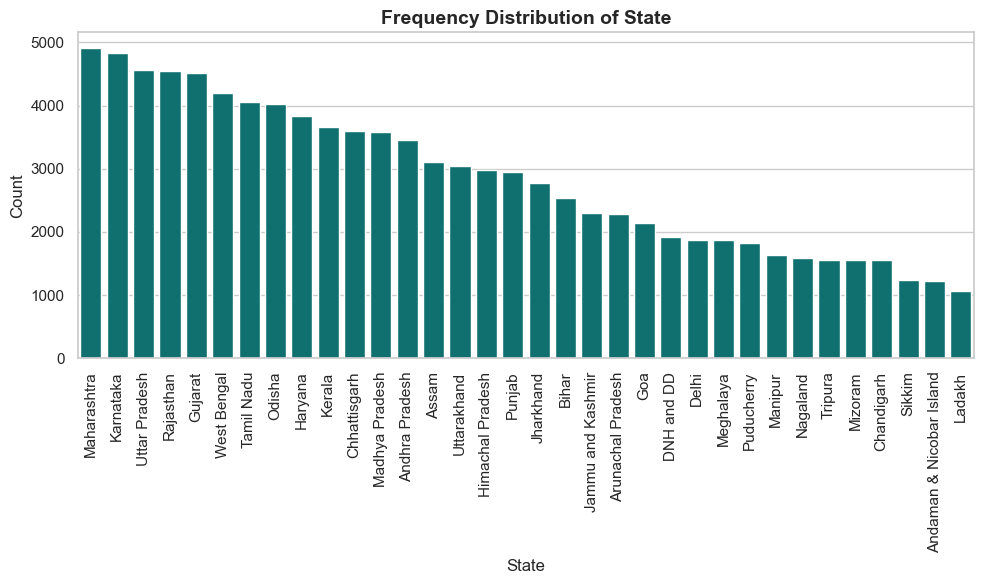

In [17]:
state_count = data['State'].value_counts().reset_index()
state_count.columns = ['State', 'Count']

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(x="State", y="Count", data=state_count, color="teal")
plt.title("Frequency Distribution of State", fontsize=14, fontweight='bold')
plt.xlabel("State", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

- Maharashtra and Karnataka contribute the highest number of records, followed by Uttar Pradesh, Rajasthan and Gujarat.
- Small states and regions like Ladakh and Andaman & Nicobar Islands have very few records.
- Overall, the data has good coverage over the years, but the data is uneven across states, with some states having a lot more information than others.

## Bivariate Analysis

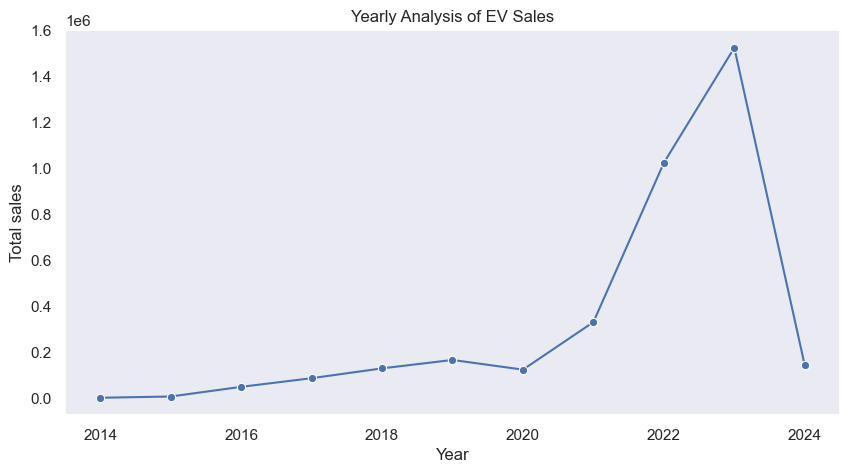

In [18]:
sns.set_style("dark")
yearly_sales = data.groupby("Year")["EV_Sales_Quantity"].sum().reset_index()
plt.figure(figsize = (10,5))
sns.lineplot(data = yearly_sales, x = "Year", y = "EV_Sales_Quantity", marker = "o")
plt.title("Yearly Analysis of EV Sales")
plt.ylabel('Total sales')
plt.show()

- EV sales showed steady but modest growth from 2014 to 2020.
- From 2021 onwards, there was an exponential rise, peaking in 2023 with sales crossing 1.5 million units, reflecting accelerated adoption of EVs.
- The sharp decline in 2024 could be due to incomplete data for the year or possible market corrections.
- Overall, the trend highlights growing acceptance and rapid adoption of EVs in recent years.

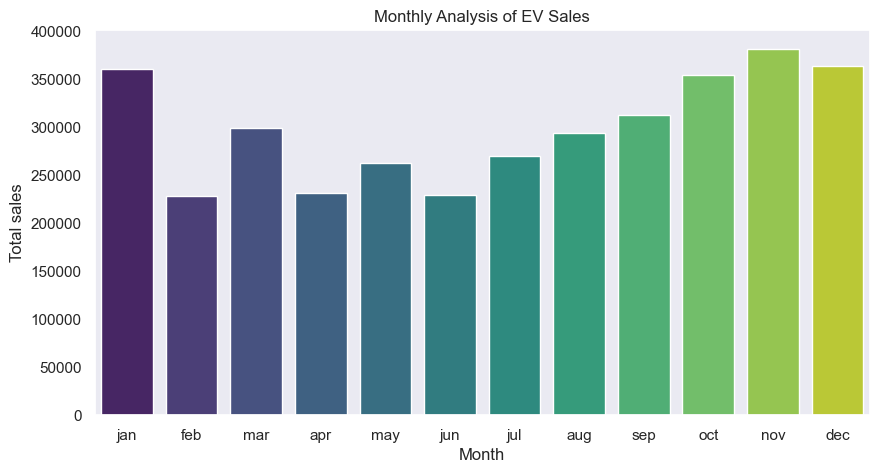

In [19]:
monthly_sales = data.groupby("Month_Name")["EV_Sales_Quantity"].sum().reset_index()
monthly_sales.columns = ["Month", "Total sales"]
Month_Name_order = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
sns.set_style("dark")
plt.figure(figsize = (10,5))
sns.barplot(data = monthly_sales, x = "Month", y = "Total sales", order = Month_Name_order, palette = "viridis")
plt.title("Monthly Analysis of EV Sales")
plt.show()


- EV sales show seasonal variations, with certain months consistently outperforming others.
- November, December, and January record the highest sales, possibly due to year-end discounts, festive seasons, or government incentive deadlines.
- April, February, and June show comparatively lower sales, indicating off-peak months.
- This seasonal trend can help businesses plan marketing campaigns, inventory, and production schedules effectively.

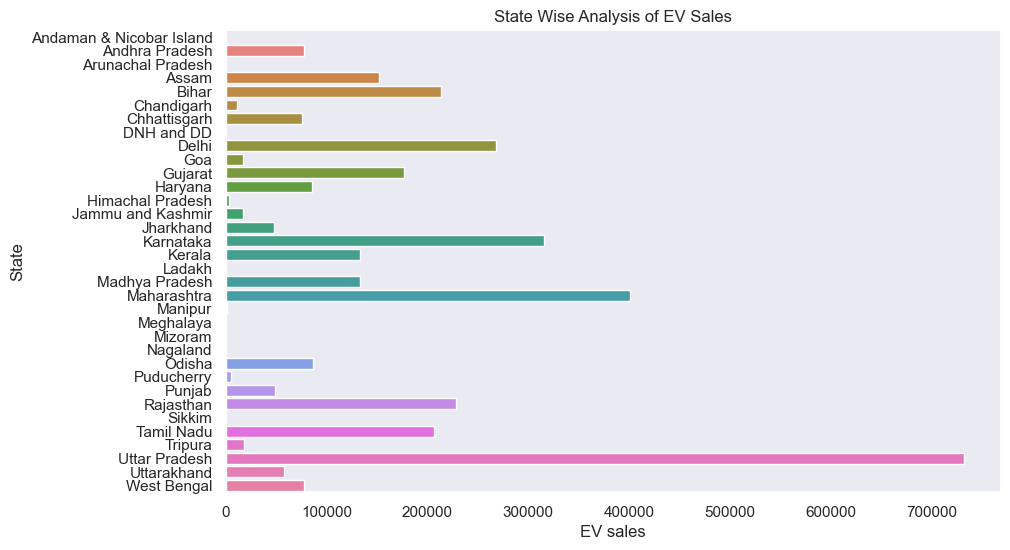

In [20]:
state_sales = data.groupby("State")["EV_Sales_Quantity"].sum().reset_index()
state_sales.columns = ["State", "EV sales"]
plt.figure(figsize = (10,6))
sns.barplot(data = state_sales, x = "EV sales", y = "State", palette = "husl")
plt.title("State Wise Analysis of EV Sales")
plt.show()

- Uttar Pradesh leads significantly, with more than 700,000 EV sales, making it the largest EV market in India.
- Maharashtra, Karnataka, Madhya Pradesh, and Delhi follow as strong contributors, showing concentrated adoption in urban and industrial hubs.
- Smaller states and union territories such as Ladakh, Himachal Pradesh, and Puducherry have very low adoption, likely due to geography, infrastructure challenges, or low demand.
- This distribution suggests that government and private players can target underpenetrated states to balance adoption nationwide.

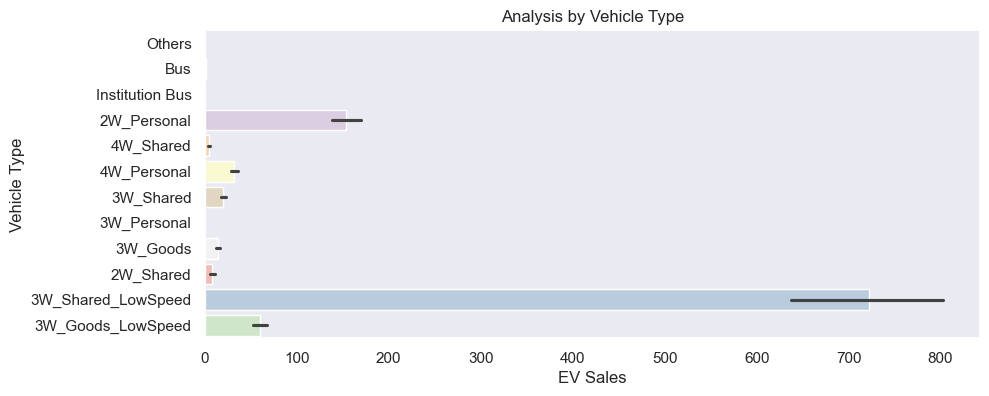

In [21]:
sns.set_style("dark")
plt.figure(figsize = (10, 4))
sns.barplot(data = data, y = "Vehicle_Type", x = "EV_Sales_Quantity", palette = "Pastel1")
plt.title("Analysis by Vehicle Type")
plt.xlabel("EV Sales")
plt.ylabel("Vehicle Type")
plt.show()

- 3W Shared (Low Speed) has the highest sales — far ahead of others.
- 2W Personal is the second most popular, showing strong individual adoption.
- 4W categories (Shared + Personal) have very low penetration.
- Goods carriers (3W_Goods, 3W_Goods_LowSpeed) show some uptake but remain small

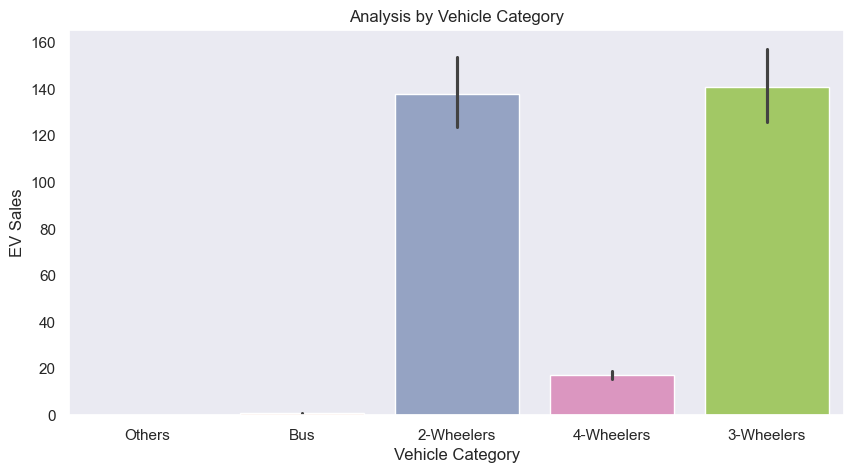

In [22]:
sns.set_style("dark")
plt.figure(figsize = (10,5))
sns.barplot(data = data, x = "Vehicle_Category", y = "EV_Sales_Quantity", palette = 'Set2')
plt.title("Analysis by Vehicle Category")
plt.xlabel("Vehicle Category")
plt.ylabel("EV Sales")
plt.show()

- 2-Wheelers and 3-Wheelers dominate EV sales.
- 4-Wheelers have very low adoption compared to 2W/3W.
- Bus sales are almost negligible.

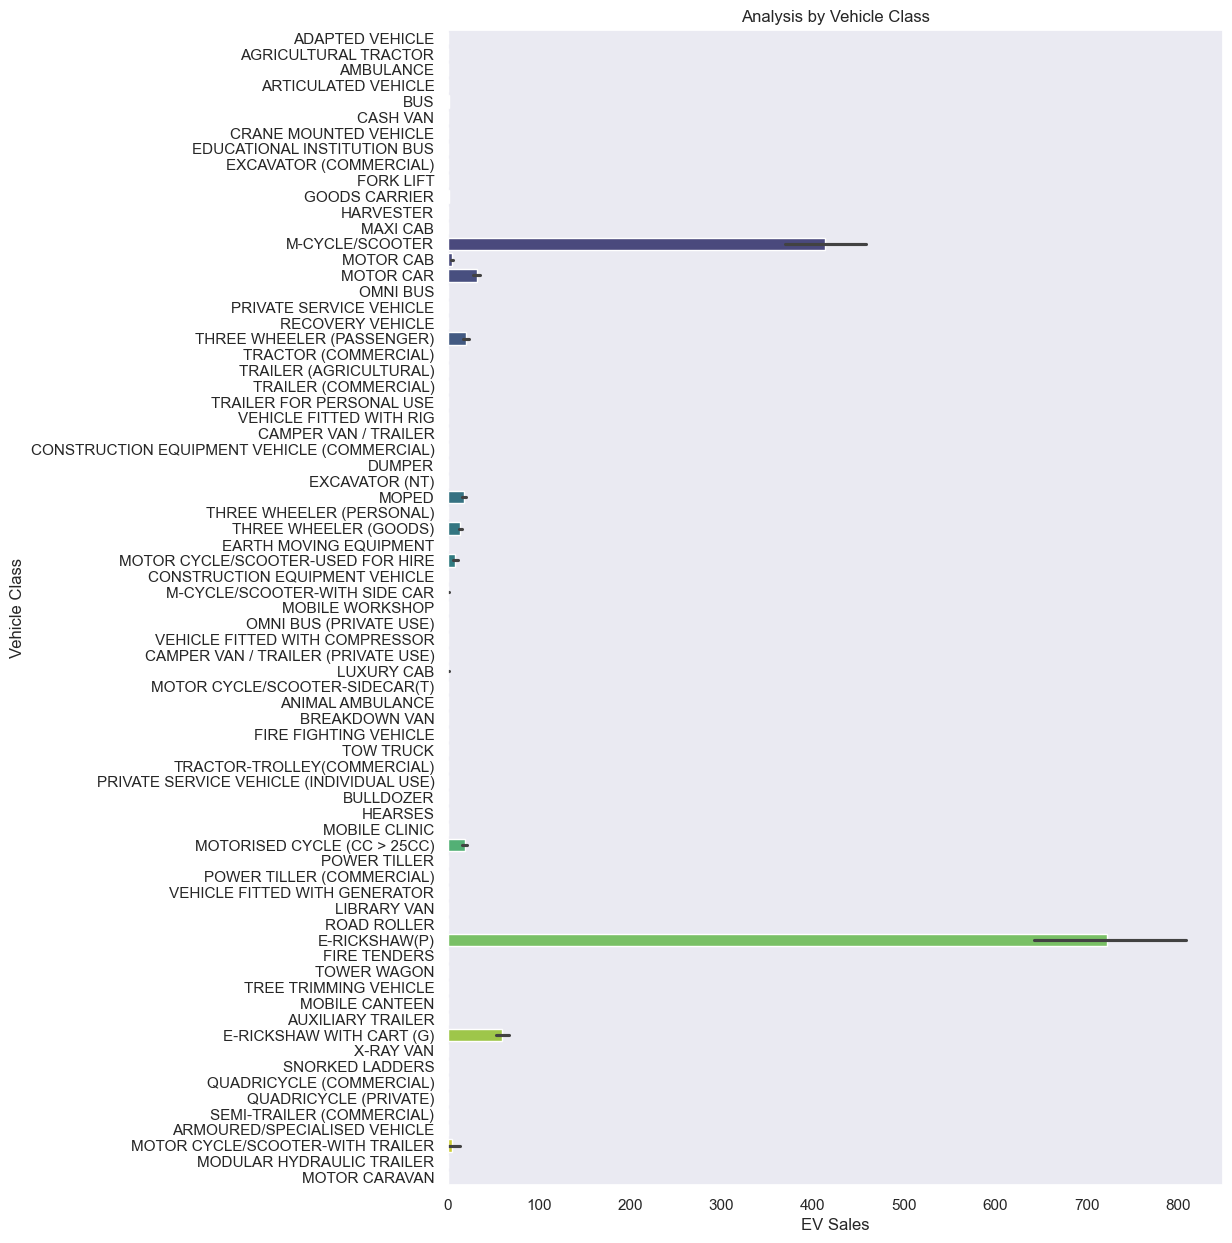

In [23]:
sns.set_style("dark")
plt.figure(figsize = (10, 15))
sns.barplot(data = data, x = "EV_Sales_Quantity", y = "Vehicle_Class", palette = "viridis")
plt.title("Analysis by Vehicle Class")
plt.xlabel("EV Sales")
plt.ylabel("Vehicle Class")
plt.show()

- EV adoption is heavily skewed towards two categories:
    - Motor Car (Passenger Vehicles)
    - Three Wheeler (Goods & Passenger Use, especially e-rickshaws)
- Other categories like buses, ambulances, tractors, and specialized vehicles show negligible adoption, indicating early-stage market presence.
- This pattern reflects that EV adoption is driven by daily-use and commercial transport needs, while heavy and specialized vehicles are still lagging due to cost, infrastructure, and technology limitations.

## Multivariate Analysis

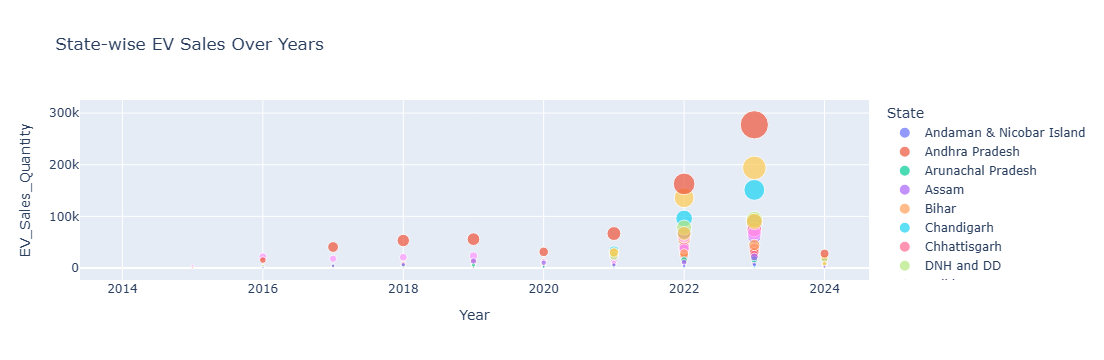

In [26]:
state_year_sales = data.groupby(["State", "Year"])["EV_Sales_Quantity"].sum().reset_index()
fig = px.scatter(state_year_sales, x = "Year", y = "EV_Sales_Quantity", color = "State", size = "EV_Sales_Quantity", hover_name = "State",
                 title="State-wise EV Sales Over Years")
fig.show()


- The chart confirms Uttar Pradesh’s dominance, with consistently higher and growing sales volumes year after year.
- States like Maharashtra, Rajasthan, Tamil Nadu, and Karnataka also show steady upward trends, highlighting their growing role in EV adoption.
- The increasing bubble sizes from 2020 onwards indicate rapid growth across multiple states simultaneously, showing that EV adoption is no longer limited to a few regions.
- However, some states still have small or stagnant bubbles, pointing to the need for targeted EV policies, infrastructure development, and awareness campaigns.

# 3. Feature Engineering

In [27]:
data.head()

,Year,Month_Name,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014,jan,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0
1,2014,jan,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0
2,2014,jan,Andhra Pradesh,AMBULANCE,Others,Others,0
3,2014,jan,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0
4,2014,jan,Andhra Pradesh,BUS,Bus,Bus,0


In [28]:
# Calculate the percentage distribution of each vehicle class in the dataset
print(data['Vehicle_Class'].value_counts(normalize = True) * 100)

Vehicle_Class
MOTOR CAR                           4.244927
M-CYCLE/SCOOTER                     4.234602
GOODS CARRIER                       4.229439
MOTOR CAB                           4.114823
BUS                                 3.937219
                                      ...   
SEMI-TRAILER (COMMERCIAL)           0.018586
X-RAY VAN                           0.012391
MOTOR CYCLE/SCOOTER-WITH TRAILER    0.009293
MODULAR HYDRAULIC TRAILER           0.003098
MOTOR CARAVAN                       0.003098
Name: proportion, Length: 73, dtype: float64


In [29]:
# calculate percentages
value_counts = data['Vehicle_Class'].value_counts(normalize=True) * 100  

# setting threshold as 1% 
threshold = 1

# find rare classes
sparse_class = value_counts[value_counts < threshold].index  

# replace them with "Other"
data['Vehicle_Class'] = data['Vehicle_Class'].replace(sparse_class, 'Other')

# check result
print(data['Vehicle_Class'].value_counts())


Vehicle_Class
Other                                       11401
MOTOR CAR                                    4111
M-CYCLE/SCOOTER                              4101
GOODS CARRIER                                4096
MOTOR CAB                                    3985
BUS                                          3813
THREE WHEELER (PASSENGER)                    3786
MAXI CAB                                     3684
MOPED                                        3399
AMBULANCE                                    3393
THREE WHEELER (GOODS)                        3208
AGRICULTURAL TRACTOR                         3186
CONSTRUCTION EQUIPMENT VEHICLE               2864
CRANE MOUNTED VEHICLE                        2437
TRACTOR (COMMERCIAL)                         2325
ADAPTED VEHICLE                              2310
M-CYCLE/SCOOTER-WITH SIDE CAR                2275
EARTH MOVING EQUIPMENT                       2181
EDUCATIONAL INSTITUTION BUS                  2093
E-RICKSHAW(P)                       

In [30]:
data.nunique()

Year                   11
Month_Name             12
State                  34
Vehicle_Class          38
Vehicle_Category        5
Vehicle_Type           12
EV_Sales_Quantity    1447
dtype: int64

- The number of unique values in the Vehicle_class column has reduced to 38 from 73.

In [31]:
# Making copy of original dataset
df = data.copy()

In [32]:
df.rename(columns = {'Month_Name': 'Month'}, inplace = True)

In [33]:
df.columns

Index(['Year', 'Month', 'State', 'Vehicle_Class', 'Vehicle_Category',
       'Vehicle_Type', 'EV_Sales_Quantity'],
      dtype='object')

In [34]:
# One hot encoding of relevant categorical columns
df = pd.get_dummies(df, columns = ['Month', 'State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type'], drop_first = True, dtype = int)

In [35]:
df.head()

,Year,EV_Sales_Quantity,Month_aug,Month_dec,Month_feb,Month_jan,Month_jul,Month_jun,Month_mar,Month_may,...,Vehicle_Type_3W_Goods,Vehicle_Type_3W_Goods_LowSpeed,Vehicle_Type_3W_Personal,Vehicle_Type_3W_Shared,Vehicle_Type_3W_Shared_LowSpeed,Vehicle_Type_4W_Personal,Vehicle_Type_4W_Shared,Vehicle_Type_Bus,Vehicle_Type_Institution Bus,Vehicle_Type_Others
0,2014,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2014,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2014,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2014,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2014,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
# Total rows and columns after OHE
df.shape

(96845, 98)

# 4. Predictive Modeling

In [37]:
# Importing required libraries and modules for model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
# Separate features and target variable
X = df.drop('EV_Sales_Quantity', axis = 1)
y = df['EV_Sales_Quantity']

In [39]:
# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [40]:
dummy = DummyRegressor(strategy = 'median')
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_dummy)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dummy))
r2 = r2_score(y_test, y_pred_dummy)

print("Dummy Regressor (baseline):")
print("MAE:", round(mae, 4))
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))

Dummy Regressor (baseline):
MAE: 42.738
RMSE: 512.0871
R²: -0.007


- The Dummy Regressor predicts EV sales using only the average value, ignoring all features.
- Its MAE is 42.7, RMSE is 512.1, and R² is -0.007, indicating that it performs worse than simply predicting the mean.
- This establishes a baseline for comparison, and any real model should aim to achieve lower errors and higher R².

In [41]:
# Linear Regression model

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_lr = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print("MAE:", round(mae, 4))
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))

Linear Regression Results:
MAE: 89.0298
RMSE: 484.1656
R²: 0.0998


- Compared to the Dummy Regressor baseline, Linear Regression shows a small improvement in R², indicating it captures some patterns in the features.
- However, MAE is higher, suggesting predictions can still be improved. This shows that Linear Regression partially learns EV sales trends, but more advanced models may perform better.

In [42]:
rf_model = RandomForestRegressor(random_state = 42, n_estimators = 100)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor:")
print("MAE:", round(mae, 4))
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))

Random Forest Regressor:
MAE: 13.7772
RMSE: 158.2282
R²: 0.9039


- The Random Forest Regressor performs significantly better than Linear Regression, achieving an MAE of 13.78, RMSE of 158.23, and R² of 0.904.
- This indicates that the model accurately captures patterns in EV sales across features, providing reliable predictions and explaining ~90% of the variation in sales.
- This model is suitable for EV sales prediction task and can be considered high-performing.

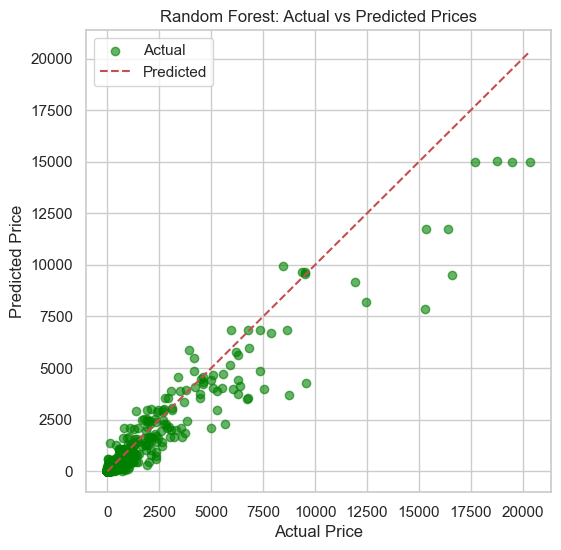

In [43]:
plt.figure(figsize = (6,6))
plt.scatter(y_test, y_pred_rf, color = 'green', alpha=0.6, label = 'Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label = 'Predicted')  
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Actual vs Predicted Prices")
plt.legend()
plt.show()

- The green dots (actual values) and the red dashed line (predicted values) seem to have a strong upward trend, indicating that the predicted prices are generally close to the actual prices. This suggests that the model is making relatively accurate predictions.
- The model appears to perform better in the lower price range, with predicted prices closely following the actual ones. The data points are more clustered along the dashed line, suggesting better accuracy in predicting lower values.
- Howeveer, at higher actual prices, the predicted values tend to have larger deviations from the actual values. This could suggest that the model struggles with accurately predicting prices in the higher range, possibly due to less data in this region or more variability in the high-price category.
- Overall, the model seems to provide reasonable predictions for most of the data points, especially in the lower to mid-price ranges. However, further tuning or additional data may be necessary to improve prediction accuracy at higher price points.

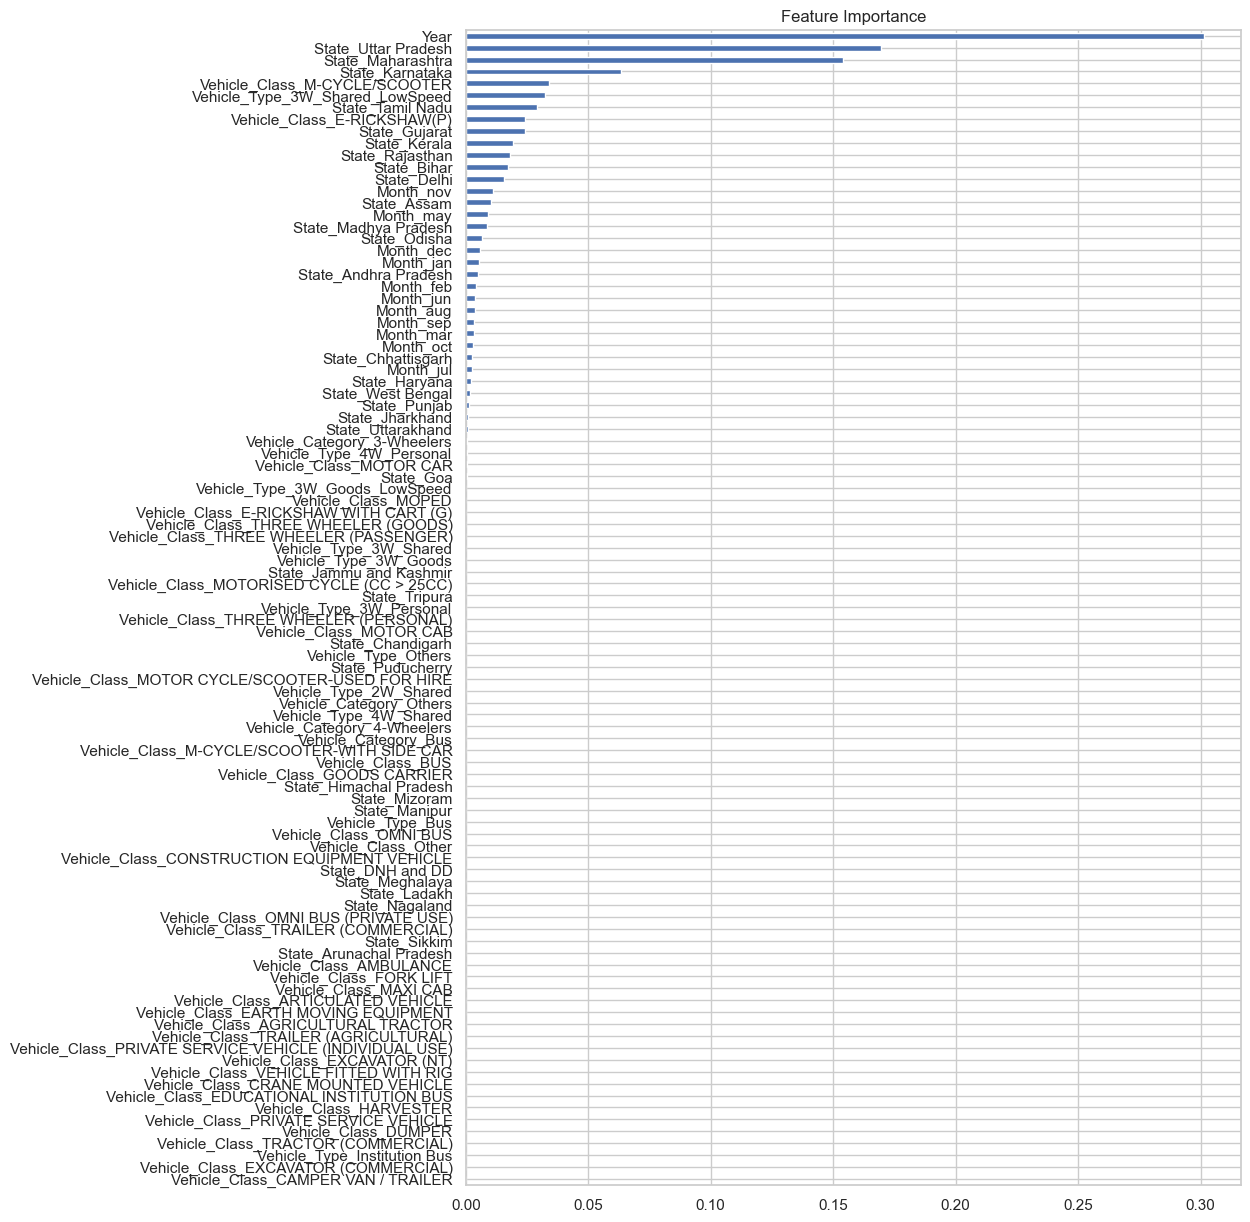

In [44]:
# Feature Importance
importance = rf_model.feature_importances_
feature_importance = pd.Series(importance, index = X_train.columns).sort_values(ascending = True)

plt.figure(figsize =(10, 15))
feature_importance.plot(kind = 'barh')
plt.title('Feature Importance')
plt.show()
